In [6]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
from IPython.display import Image
from sklearn.externals.six import StringIO
from sklearn.tree import export_graphviz
import pydot
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.cluster import KMeans

In [7]:
df=pd.read_csv("C:/Users/WIN10/Downloads/ml and al/mnist_train.csv")
r=df.head(30000)

In [8]:
df.size

32970000

In [9]:
x=r.drop('label',axis=1)
x.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [10]:
y=r.label
y.head()

0    1
1    0
2    1
3    4
4    0
Name: label, dtype: int64

In [10]:
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE

model_TSNE =TSNE(n_components=2,random_state=2)
standard_data=StandardScaler().fit_transform(x)
tsne_data=model_TSNE.fit_transform(standard_data)
#v stack is vertical stack
data=np.vstack((tsne_data.T,y)).T
                     
data_f=pd.DataFrame(data,columns=('Dim_1','Dim_2','Labels'))
#labels is the target column
data_f.head()

C:\Users\WIN10\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\WIN10\Anaconda3\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


,Dim_1,Dim_2,Labels
0,14.095127,-32.091328,1.0
1,54.276890,24.174526,0.0
2,3.587058,-65.349060,1.0
3,-51.632179,24.763544,4.0
4,60.776478,27.533733,0.0


C:\Users\WIN10\Anaconda3\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


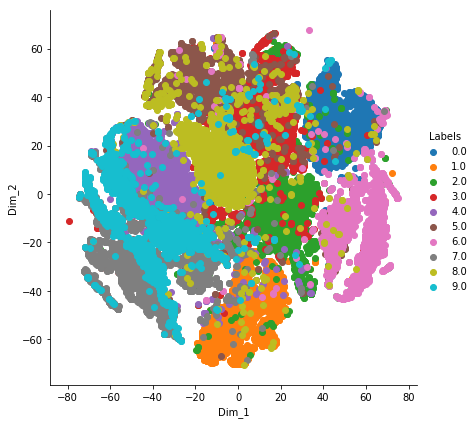

In [11]:
sns.FacetGrid(data_f,hue='Labels',size=6).map(plt.scatter,'Dim_1','Dim_2').add_legend()
plt.show()

# pca

In [11]:
from sklearn import decomposition
#rom sklearn.decomposition import PCA()
pca = decomposition.PCA()

In [12]:
pca.n_components =2
pca_data=pca.fit_transform(x)
print('shape of pca_reduced shape',pca_data.shape)

shape of pca_reduced shape (30000, 2)


In [13]:
pca_labels=np.vstack((pca_data.T,y)).T
data_df=pd.DataFrame(pca_labels,columns=('Dim_1','Dim_2','Labels'))
#labels is the target column
data_df.head()


,Dim_1,Dim_2,Labels
0,-661.900357,-693.393521,1.0
1,1698.256946,-380.180492,0.0
2,-891.422351,-296.927002,1.0
3,-164.306255,278.305482,4.0
4,1920.272723,-467.063193,0.0


C:\Users\WIN10\Anaconda3\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


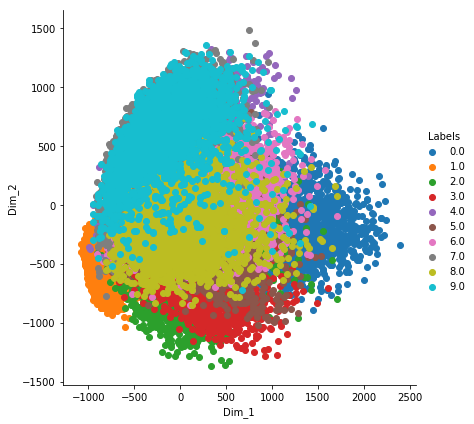

In [14]:
sns.FacetGrid(data_df,hue='Labels',size=6).map(plt.scatter,'Dim_1','Dim_2').add_legend()
plt.show()

# image compression

(183, 275, 3)


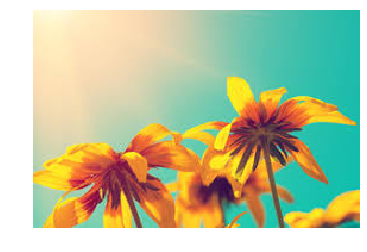

In [45]:
#https://shankarmsy.github.io/posts/pca-sklearn.html
import matplotlib.image as mpimg
img = mpimg.imread('C:/Users/WIN10/Downloads/ml and al/sunflower.jpg')
print(img.shape) 
plt.axis('off')
plt.imshow(img)

In [46]:
img_r = np.reshape(img, (183,825)) 
print(img_r.shape) 
#- See more at: https://shankarmsy.github.io/posts/pca-sklearn.html#sthash.4TLnHi59.dpuf

(183, 825)


In [47]:
from sklearn.decomposition import PCA as RandomizedPCA

ipca = RandomizedPCA(64).fit(img_r) 
img_c = ipca.transform(img_r) 
print(img_c.shape) 
print(np.sum(ipca.explained_variance_ratio_)) 

(183, 64)
0.9952644949926128


In [48]:
temp = ipca.inverse_transform(img_c) 
print (temp.shape)

(183, 825)


In [49]:
temp = np.reshape(temp, (183,275,3))
print (temp1.shape) 

(183, 275, 3)


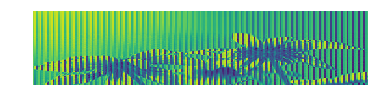

In [44]:
plt.axis('off') 
plt.imshow(temp)